<h1>Chapter 3 | <b>Extra</b> Data Exercise |  EDA With Football Data (Part 2)</h1>

<p>In the following notebook, we managed to extract the data from the Brazilian main football League for the year 2022. We made an API call by creating a simple function that requested the required data, returning a json file. We then got the necessary variables for our analysis and created our DataFrame, which was enriched with calculations using pandas. We will now:</p>
<ul>
    <li>Clean the data</li>
    <li>Explore the data</li>
</ul>
<p>We will take a quick look at the dataset and make sure there are no missing values or duplicates. Then, we will reproduce the book's exploratory analysis, which focused on investigating how likely are home teams to win matches.</p>
<p>
<h2>Clean the data</h2>
<p>Let's import the required libraries and set up our working directories.</p>


In [451]:
import pandas as pd
import numpy as np
import os
import sys
from plotnine import *
import warnings
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")

In [452]:
# Define working directory folders
dirname = os.getcwd()
data_in = f"{dirname}/data/output/raw/" 
data_out = f"{dirname}/data/output/clean/"
func = f"{dirname.split('da_data_exercises')[0]}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [453]:
# Import the prewritten helper functions
from py_helper_functions import *

<h3>Read the data</h3>

In [454]:
df = pd.read_csv(f"{data_in}football_brl_raw.csv")

<h3>Check for Missing Values</h3>

In [455]:
df.shape

(380, 11)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   div             380 non-null    object
 1   season          380 non-null    int64 
 2   team_home       380 non-null    object
 3   team_away       380 non-null    object
 4   points_home     380 non-null    int64 
 5   points_away     380 non-null    int64 
 6   goals_home      380 non-null    int64 
 7   goals_away      380 non-null    int64 
 8   home_goaladv    380 non-null    int64 
 9   team_home_logo  380 non-null    object
 10  team_away_logo  380 non-null    object
dtypes: int64(6), object(5)
memory usage: 32.8+ KB


In [457]:
# Check for missing values and sum the rows with missing values
missing_values_sum = df.isnull().sum(axis=1).sum()

print(f"Number of rows with missing values: {missing_values_sum}")

Number of rows with missing values: 0


<p>Great! Our dataset has no missing values. Let's check whether there are any duplicates.</p>

<h3>Check for Duplicates</h3>

In [458]:
# Check for duplicates and sum the rows wiht duplicates
duplicates_sum = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_sum}")

Number of duplicate rows: 0


<p>Ok, we can move on to our exploratory analysis. For academic purposes, we can export the dataset (although is the same) to the clean directory, so that whoever (myself included) accesses this repo knows where each dataset is stored.</p>

In [459]:
df.to_csv(f"{data_out}football_brl_clean.csv", index=False)

<hr>
<h2>Explore the Data</h2>
<p>We'll do two kinds of EDA. The first will reproduce the book's Study Case C1 from Chapter 3. Then, we'll reproduce other statistical analyses just because.</p>
<h3> 1. Book | Describing the home team - away difference </h3>
<p>Let's reproduce our version of Table 3.7 to get the main statistics for <code>"home_goaladv"</code>.</p>

In [460]:
df.head()

,div,season,team_home,team_away,points_home,points_away,goals_home,goals_away,home_goaladv,team_home_logo,team_away_logo
0,Serie A,2022,Atletico-MG,Internacional,3,0,2,0,2,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
1,Serie A,2022,Fluminense,Santos,1,1,0,0,0,https://media-1.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
2,Serie A,2022,Sao Paulo,Atletico Paranaense,3,0,4,0,4,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
3,Serie A,2022,Palmeiras,Ceara,0,3,2,3,-1,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
4,Serie A,2022,Botafogo,Corinthians,0,3,1,3,-2,https://media-1.api-sports.io/football/teams/1...,https://media-3.api-sports.io/football/teams/1...


In [461]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            df["home_goaladv"].describe()["mean"],
            df["home_goaladv"].describe()["std"],
            (df["home_goaladv"] > 0).sum() / df["home_goaladv"].shape[0] * 100,
            (df["home_goaladv"] == 0).sum() / df["home_goaladv"].shape[0] * 100,
            (df["home_goaladv"] < 0).sum() / df["home_goaladv"].shape[0] * 100,
            df["home_goaladv"].describe()["count"],
        ],
    }
).round(1)

,Statistics,Value
0,Mean,0.4
1,Standard deviation,1.5
2,Percent positive,44.2
3,Percent zero,28.4
4,Percent negative,27.4
5,Number of observations,380.0


<hr>
<b>Table 3.9</b> <i>Describing the home team - away team goal difference</i>
<p>Let's make some observations on these statistics:</p>
<ol>
    <li><b>Mean</b>. A <code>0.4</code> value suggests that home team has a slight advantage over team away. This statistic suggest that home teams tended to score slightly more goals than the away teams.</li>
    <li><b>Standard deviation</b>. A value of <code>1.5</code> quantifies the variability or spread of the goal difference values. As the standard deviation is somewhat small compared to the mean, we can conclude that the majority of matches had goal differences <b>close to the average</b>. This does not exclude the possibility of larger goal differences in some cases, as the standard deviation is sensitive to extreme values.</li>
    <li><b>Percent positive</b>. In <code>44.2%</code> of the matches, the home team scored more goals than the away team, which means more wins for home teams.</li>
    <li><b>Percent zero</b>. With a value of <code>27.4%</code>, this indiates that nearly one third of the matches ended in a draw.</li>
    <li><b>Percent negative</b>. A value of <code>27.4%</code> indicates that the away team scored more goals than the home team in 27% of the matches.</li>
</ol>
<p>Overall, despite having a slight advantage at home, home teams have either lost or ended in a draw with away teams in more than half of the observations. Let's dive deeper into these numbers and plot our histogram.</p>

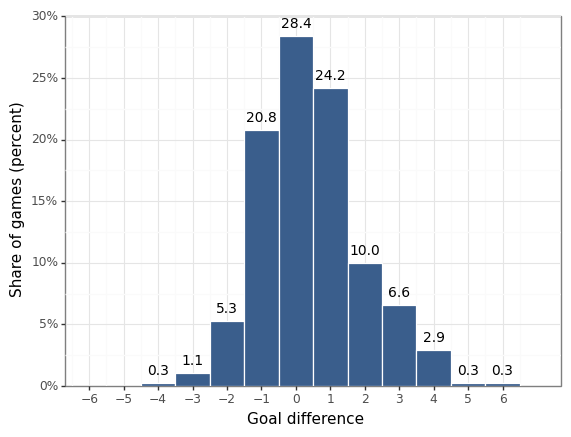

<ggplot: (156259931389)>

In [462]:
ggplot(df, aes(x="home_goaladv", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=1,
) + geom_text(
    aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
    stat="count",
    size=10,
    nudge_y=0.01,
) + labs(
    x="Goal difference", y="Share of games (percent)"
) + scale_x_continuous(
    expand=(0.05, 0.05), limits=(-6, 7), breaks=seq(-6, 7, by=1)
) + scale_y_continuous(
    expand=(0, 0),
    limits=(0, 0.3),
    breaks=seq(0, 0.35, by=0.05),
    labels=percent_format(),
) + theme_bw()

<p>Some observations:</p>
<ul>
    <li>Overall, the distribution of goal differences seems not to follow a normal distribution - although is not far from it. While the mode and the median are both 0, a mean value of 0.4 suggests a skew, probably to the right. This would confirm the fact that the home team has a slight advantage over the away team.</li>
    <li>This is particularly true when considering the positive goal difference values. We can see that if 24.2% of the matches ended with a 1 goal difference for home team, some higher goal differences were also observed. For instance, home team won 10% of the matches with a 2 goal difference, and, going further, it on 6.6% of the matches with a 3 difference. If we take a look at the extreme portion of the histogram, we can see some extreme values - a goal difference of 5 and 6 goals in 0.3% of the matches for each difference.</li>
    <li>The same cannot be said about the away team. When comparing the above goal differences with those for the away team (that is, the negative goal differences), we see that the away team has a lower probability of scoring goal when compared to the home team in all goal differences. There was only 0.3% of games with a goal difference of 4 goals for the away team, for instance.</li>
    <li>As such, we are dealing with a skewed distribution, in which home teams tend to win more games and score more goals.</li>
</ul>
<p>And how some of the teams performed regarding goal differences at home? We can create a table that shows the 2022 final standings and select a few teams.</p> 

In [463]:
classification = pd.DataFrame()

# Create a list of unique teams by combining both team columns
teams = pd.concat([df["team_home"], df["team_away"]]).unique()

# Calculate total points for each team using apply and lambda functions
classification["team"] = teams
classification["total_points"] = classification["team"].apply(
    lambda team: df.loc[df["team_home"] == team, "points_home"].sum() +
    df.loc[df["team_away"] == team, "points_away"]. sum()
    )

In [464]:
classification = classification.sort_values(by="total_points", ascending=False)
classification = classification.reset_index(drop=True)
classification.index += 1

<hr>
<h4><b>OBSERVATION:</b></h4>
<p>The following code will return the sum of points for each team as home and away teams. It will also return the sum of goals for home and away matches. I will use this DataFrame in Tableau.</p>
<hr>

In [465]:
classification["points_home"] = classification["team"].apply(
    lambda team: df.loc[df["team_home"] == team, "points_home"].sum()
)

classification["points_away"] = classification["team"].apply(
    lambda team: df.loc[df["team_away"] == team, "points_away"].sum()
)

classification["goals_home"] = classification["team"].apply(
    lambda team: df.loc[df["team_home"] == team, "goals_home"].sum()
)

classification["goals_away"] = classification["team"].apply(
    lambda team: df.loc[df["team_away"] == team, "goals_away"].sum()
)

classification["home_goaladv"] = classification["team"].apply(
    lambda team: df.loc[df["team_home"] == team, "home_goaladv"].sum()
)

In [466]:
df.head()

,div,season,team_home,team_away,points_home,points_away,goals_home,goals_away,home_goaladv,team_home_logo,team_away_logo
0,Serie A,2022,Atletico-MG,Internacional,3,0,2,0,2,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
1,Serie A,2022,Fluminense,Santos,1,1,0,0,0,https://media-1.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
2,Serie A,2022,Sao Paulo,Atletico Paranaense,3,0,4,0,4,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
3,Serie A,2022,Palmeiras,Ceara,0,3,2,3,-1,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
4,Serie A,2022,Botafogo,Corinthians,0,3,1,3,-2,https://media-1.api-sports.io/football/teams/1...,https://media-3.api-sports.io/football/teams/1...


In [467]:
df.head()

,div,season,team_home,team_away,points_home,points_away,goals_home,goals_away,home_goaladv,team_home_logo,team_away_logo
0,Serie A,2022,Atletico-MG,Internacional,3,0,2,0,2,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
1,Serie A,2022,Fluminense,Santos,1,1,0,0,0,https://media-1.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
2,Serie A,2022,Sao Paulo,Atletico Paranaense,3,0,4,0,4,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
3,Serie A,2022,Palmeiras,Ceara,0,3,2,3,-1,https://media-2.api-sports.io/football/teams/1...,https://media-2.api-sports.io/football/teams/1...
4,Serie A,2022,Botafogo,Corinthians,0,3,1,3,-2,https://media-1.api-sports.io/football/teams/1...,https://media-3.api-sports.io/football/teams/1...


In [468]:
classification

,team,total_points,points_home,points_away,goals_home,goals_away,home_goaladv
1,Palmeiras,81,43,38,39,27,27
2,Internacional,73,44,29,40,18,26
3,Fluminense,70,39,31,39,24,19
4,Corinthians,65,40,25,24,20,13
5,Flamengo,62,36,26,37,23,22
6,Atletico-MG,58,29,29,25,20,7
7,Atletico Paranaense,58,39,19,31,17,14
8,Fortaleza EC,55,29,26,24,22,11
9,Sao Paulo,54,30,24,32,23,11
10,Botafogo,53,22,31,18,23,-1


In [56]:
# Export the standings table as csv
classification.to_csv(f"{data_out}2022_standings.csv")

<p>Let's compare the top and bottom 3 teams to see the differences in their statistics.</p>

In [55]:
df.loc[
    lambda x: x["team_home"].isin(
        ["Internacional", "Palmeiras",  "Fluminense", "Atletico Goianiense", "Avai", "Juventude"]
    )
].groupby(by="team_home").agg(
    Count=("home_goaladv", "size"),
    Mean=("home_goaladv", np.mean),
    Median=("home_goaladv", np.median),
    Std=("home_goaladv", np.std),
    Min=("home_goaladv", min),
    Max=("home_goaladv", max),
    Mode=("home_goaladv", pd.Series.mode)
).sort_values(by="Median", ascending=False)

,Count,Mean,Median,Std,Min,Max,Mode
team_home,,,,,,,
Fluminense,19,1.000000,1.0,1.795055,-2,4,1
Internacional,19,1.368421,1.0,1.382852,-1,4,"[0, 1]"
Palmeiras,19,1.421053,1.0,1.742150,-2,4,1
Atletico Goianiense,19,-0.052632,0.0,1.129094,-2,2,-1
Avai,19,-0.105263,0.0,1.196975,-3,2,-1
Juventude,19,-0.473684,0.0,0.964274,-3,1,0


<p>We can see how the top 3 teams present a mean value way above the overall mean. The bottom 3 teams, meanwhile, showed a negative mean, which means that they actually <i>lost</i> many games as home team. This is confirmed by their low standard deviation values, which indicate lower variability and therefore a higher chance that the goal difference is not far from the mean. We can state that, most likely, their matches at home ended at a draw or a loss. If we consider the lowest goal difference values, we can see that they lost matches with a 2 to 3 goal difference - these values probably skew our distribution and affect the mean and the standard deviation. And indeed, their mode indicate that the most frequent values were 0 and -1, which confirm these observation. The top 3 teams, meanwhile, presented a median of 1 goal difference, which means that their distribution would be more to the right than the bottom 3 teams. They presented higher standard deviation values, which means that, most likely, their goal difference values varied more. And it is true, as we can see in their max values. Their mode observations also indicate that the most frequent values are 1. </p>
<p>As such, we can conclude that a good standing depends on good performance at home matches. We can also observe that not always home teams presented a home advantage, which affected their performance in the League. While an overall performance may depend on other factors such as performance at away matches, we can affirm that performing well as a home team is fundamental and expected if the team wants to perform well.</p>